In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns

## Proving correlations between markets rise in bears

[**********************83%%**************        ]  5 of 6 completed

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages

[*********************100%%**********************]  6 of 6 completed


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


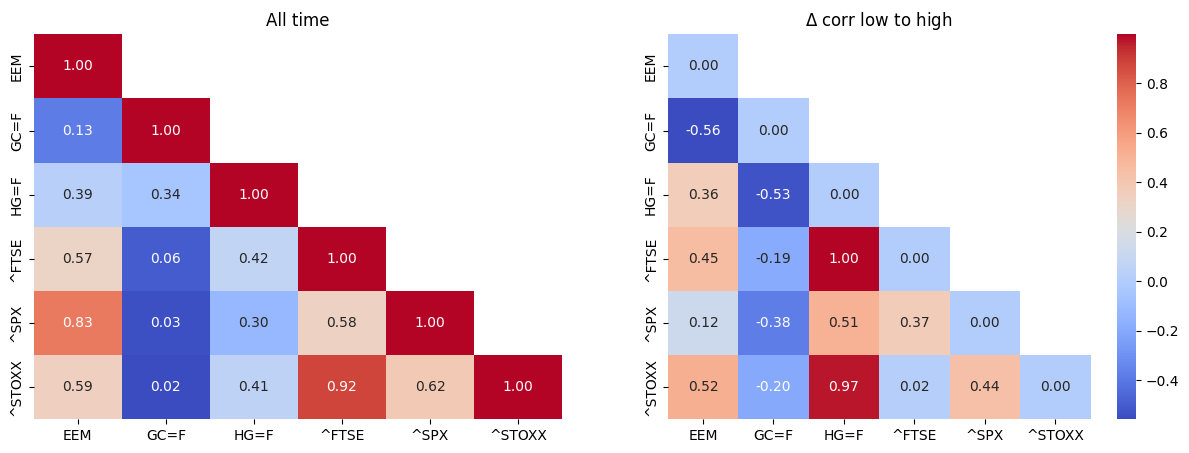

In [2]:
returns = yf.download(['^SPX', 'EEM', '^FTSE', '^STOXX', 'GC=F','HG=F'], period='max').Close.dropna().pct_change()

# Plot correlation matrix for each regime
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the three correlation matrices on subplots
sns.heatmap(returns.corr(), annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(returns.corr(), k=1), ax=ax[0])
ax[0].set_title('All time')
low_vol = returns.loc['2005-04-30':'2006-04-30', :].corr()
# sns.heatmap(low_vol, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(low_vol.corr(), k=1), ax=ax[1])
# ax[1].set_title('Low Vol')
high_vol = returns.loc['2008-04-30':'2009-04-30', :].corr()
# sns.heatmap(high_vol, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(high_vol.corr(), k=1), ax=ax[2])
# ax[2].set_title('High Vol')
sns.heatmap(high_vol.corr() - low_vol.corr(), mask=np.triu(returns.corr(), k=1), annot=True, fmt=".2f", cmap='coolwarm')
ax[1].set_title(r'$\Delta$ corr low to high')
ax[0].collections[0].colorbar.remove()

# delete all color bars apart from last one
# for i in range(3):
#     ax[i].collections[0].colorbar.remove()
# plt.tight_layout() 

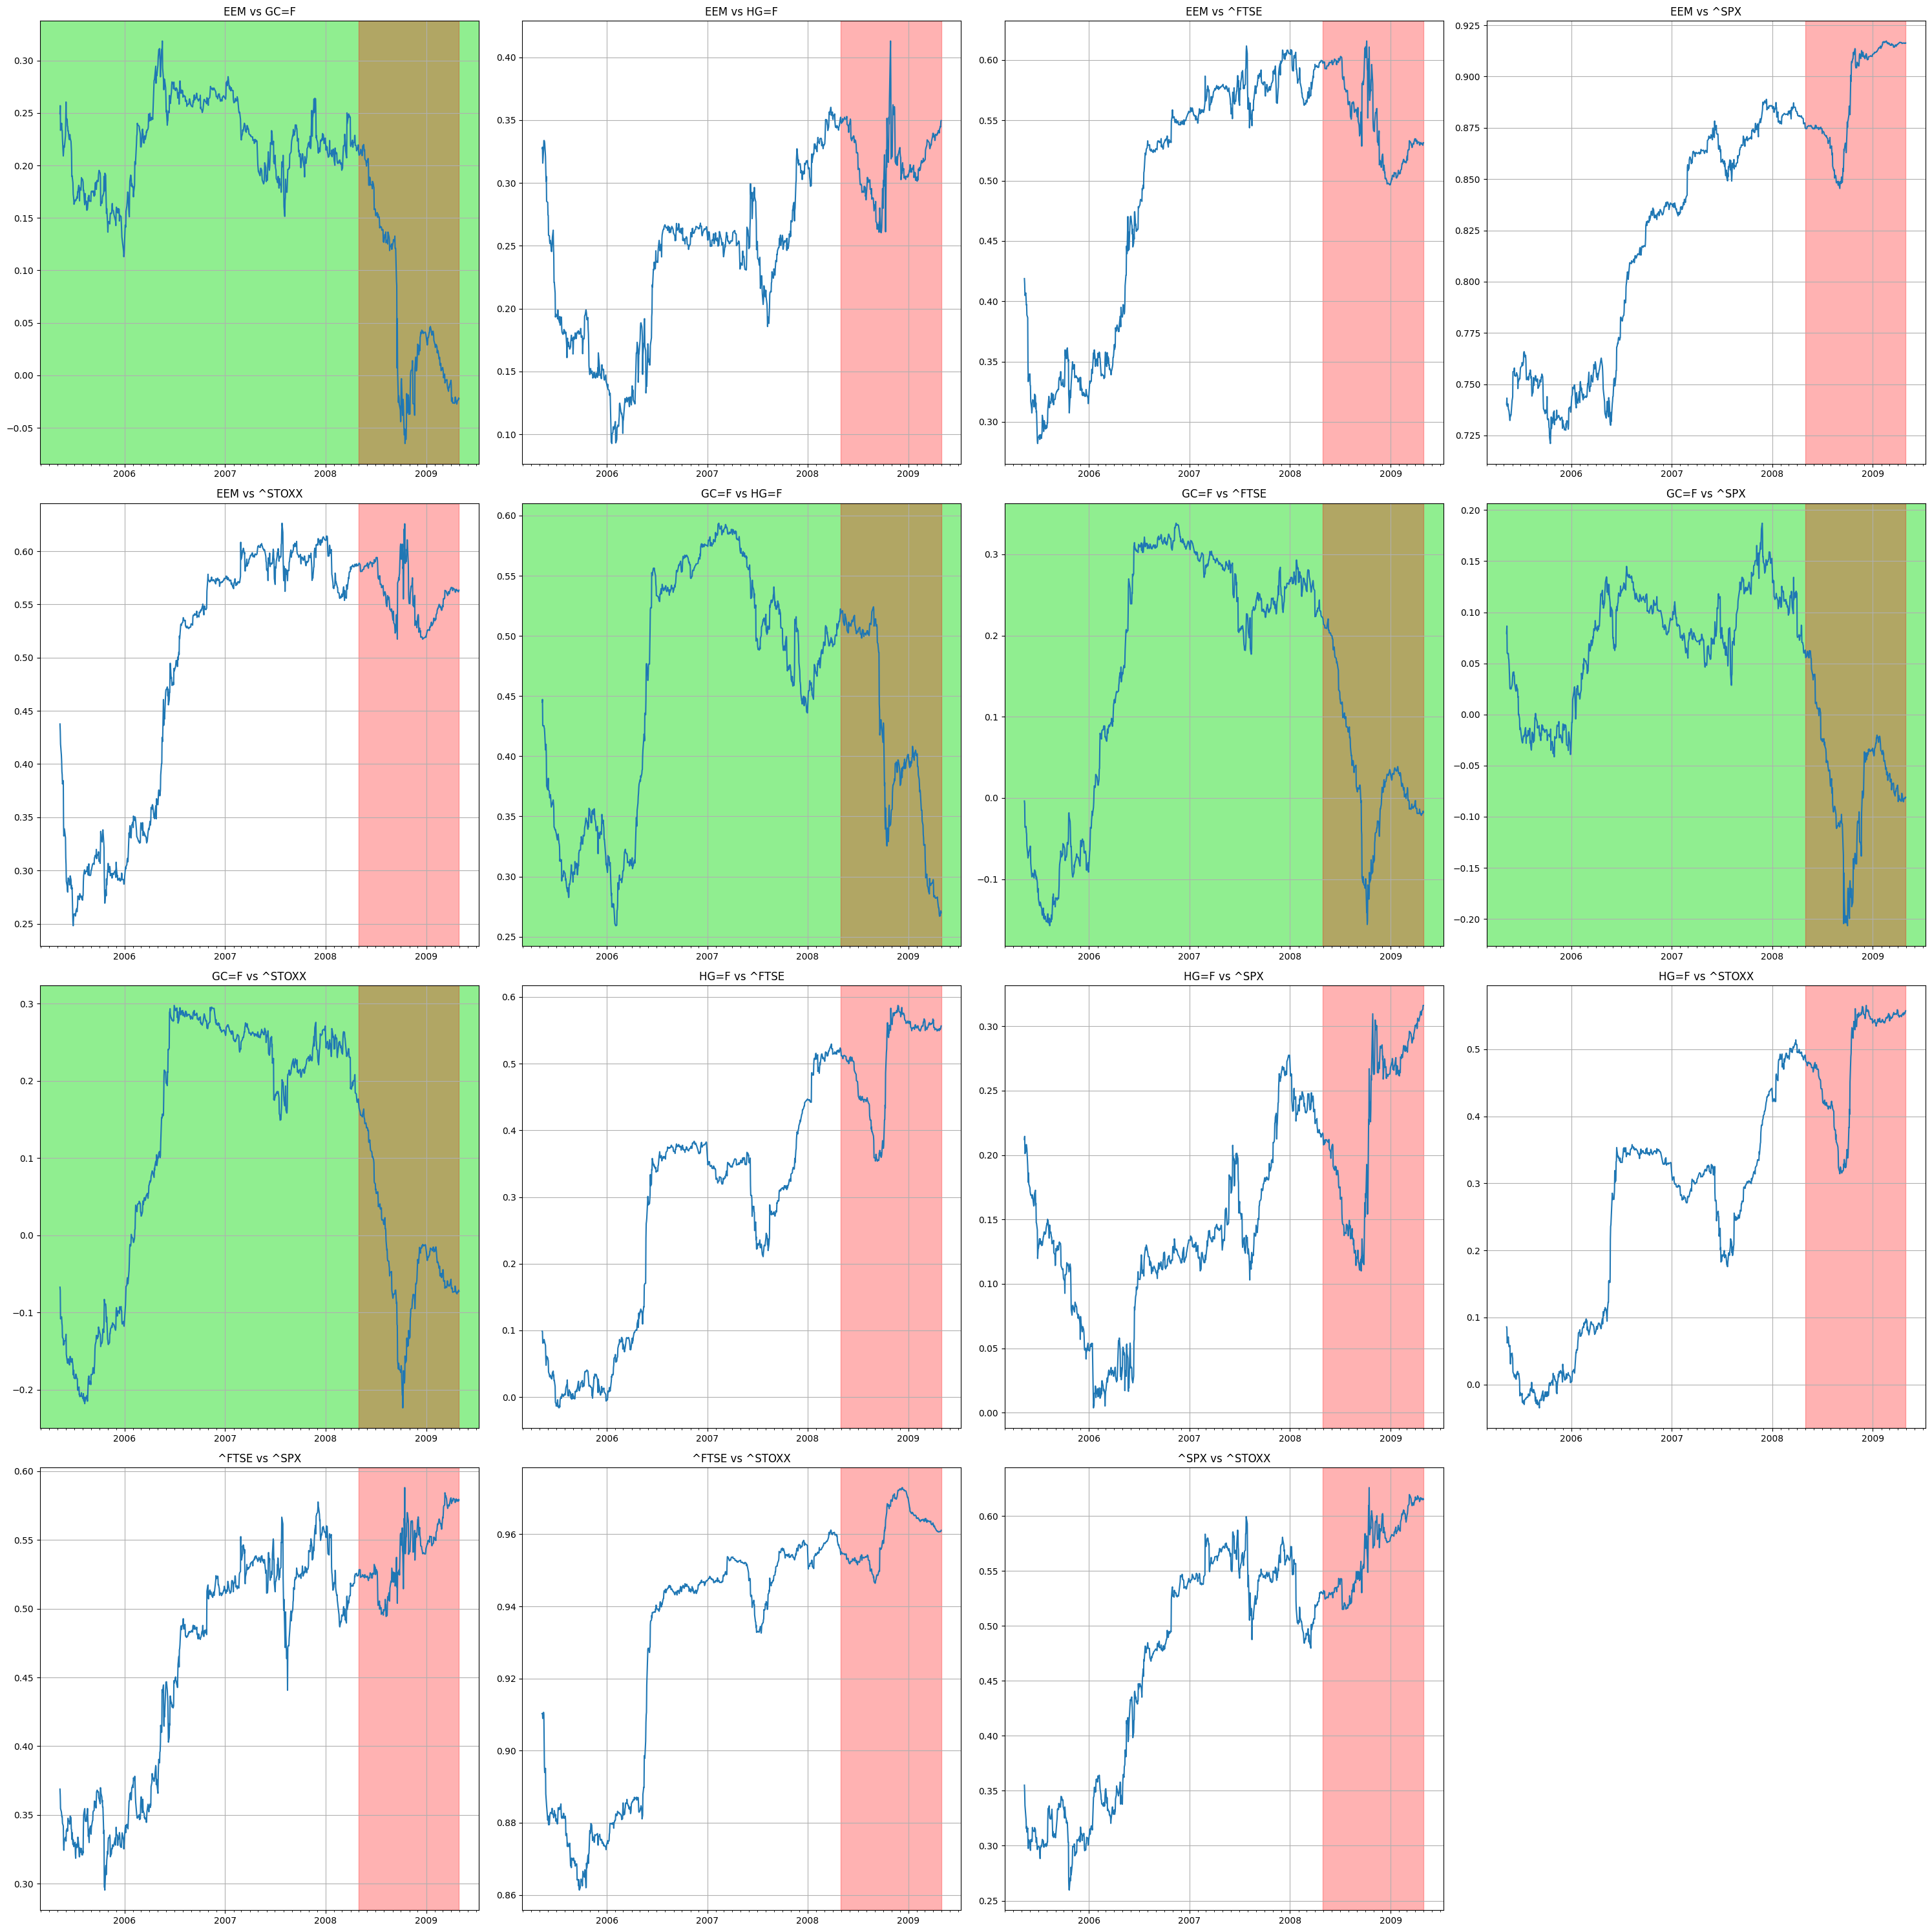

In [3]:
# rolling correlations plot
roll_corr = returns.rolling(window=252).corr()
roll_corr = roll_corr.dropna().unstack().reset_index()
roll_corr.set_index('Date', inplace=True)

# drop columns with the same name
roll_corr.drop(columns=[('^SPX', '^SPX')], inplace=True)
roll_corr.drop(columns=[('EEM', 'EEM')], inplace=True)
roll_corr.drop(columns=[('^FTSE', '^FTSE')], inplace=True)
roll_corr.drop(columns=[('^STOXX', '^STOXX')], inplace=True)
roll_corr.drop(columns=[('GC=F', 'GC=F')], inplace=True)
roll_corr.drop(columns=[('HG=F', 'HG=F')], inplace=True)

# print 6 subplots of the rolling 50day correlation for each asset at level 1 vs all other assets
roll_corr = roll_corr.loc['2005-04-30':'2009-04-30', :]

# Only use each pair once
cols_used = []
for i, col in enumerate(roll_corr.columns):
    if [col[0], col[1]] not in cols_used and [col[1], col[0]] not in cols_used:
        cols_used.append([col[0], col[1]])
    else:
        continue

# plot the rolling 50day correlation of each pair in cols_used
fig, ax = plt.subplots(4, 4, figsize=(30, 30))
for i, col in enumerate(cols_used):
    # ax[i//4, i%4].plot(roll_corr[col])
    ax[i//4, i%4].plot(roll_corr[col[0], col[1]])
    ax[i//4, i%4].set_title(f'{col[0]} vs {col[1]}')
    # ax[i//3, i%3].hlines(0, corr_df.index[0], corr_df.index[-1], 'r')
    ax[i//4, i%4].axvspan('2008-04-30', '2009-04-30', color='red', alpha=0.3)
    if col[0] == 'GC=F' or col[1] == 'GC=F':
        ax[i//4, i%4].set_facecolor('lightgreen')
    ax[i//4, i%4].xaxis.set_major_locator(mdates.YearLocator())
    ax[i//4, i%4].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax[i//4, i%4].xaxis.set_minor_locator(mdates.MonthLocator())
    ax[i//4, i%4].grid(True)

fig.delaxes(ax[-1, -1])
fig.tight_layout()

In [4]:
# FXVIX, EVIX adn VIX correlation lag
df = pd.read_csv('MyData/vixPX.csv', index_col='Dates').pct_change().dropna()
df.rename(columns={'VIX Index': 'SPX Vol', 'CVIX Index': 'Currency Vol', 'V2X Index': 'Eurostox Vol'}, inplace=True)
df.head(2)

,SPX Vol,Currency Vol,Eurostox Vol
Dates,,,
30/08/2001,0.103343,-0.003072,0.055238
31/08/2001,-0.019284,0.000006,-0.007581


In [5]:
vol_roll_corr = df.rolling(window=252).corr()
vol_roll_corr = vol_roll_corr.dropna().unstack().reset_index()
vol_roll_corr.set_index('Dates', inplace=True)
vol_roll_corr.drop(columns=[('SPX Vol', 'SPX Vol'), ('Currency Vol', 'Currency Vol'), ('Eurostox Vol'), ('Currency Vol', 'SPX Vol')], inplace=True)
# vol_roll_corr = vol_roll_corr.droplevel(1, axis=1)
vol_roll_corr.head(3)

SPX Vol              Currency Vol
           Currency Vol Eurostox Vol Eurostox Vol
Dates                                            
16/08/2002     0.121289     0.332919     0.246965
19/08/2002     0.123580     0.328428     0.250726
20/08/2002     0.122619     0.329238     0.249428

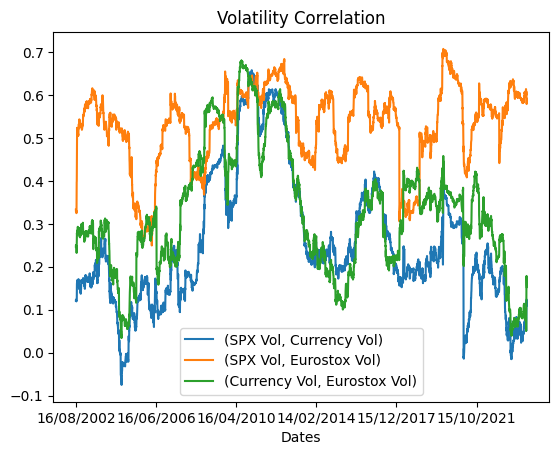

In [6]:
vol_roll_corr.plot(label=['SPX/Currencty', 'SPX/Eurostox', 'Currency/Eurostox'], title='Volatility Correlation')
plt.legend()

## Examining Distributional Properties of each regime

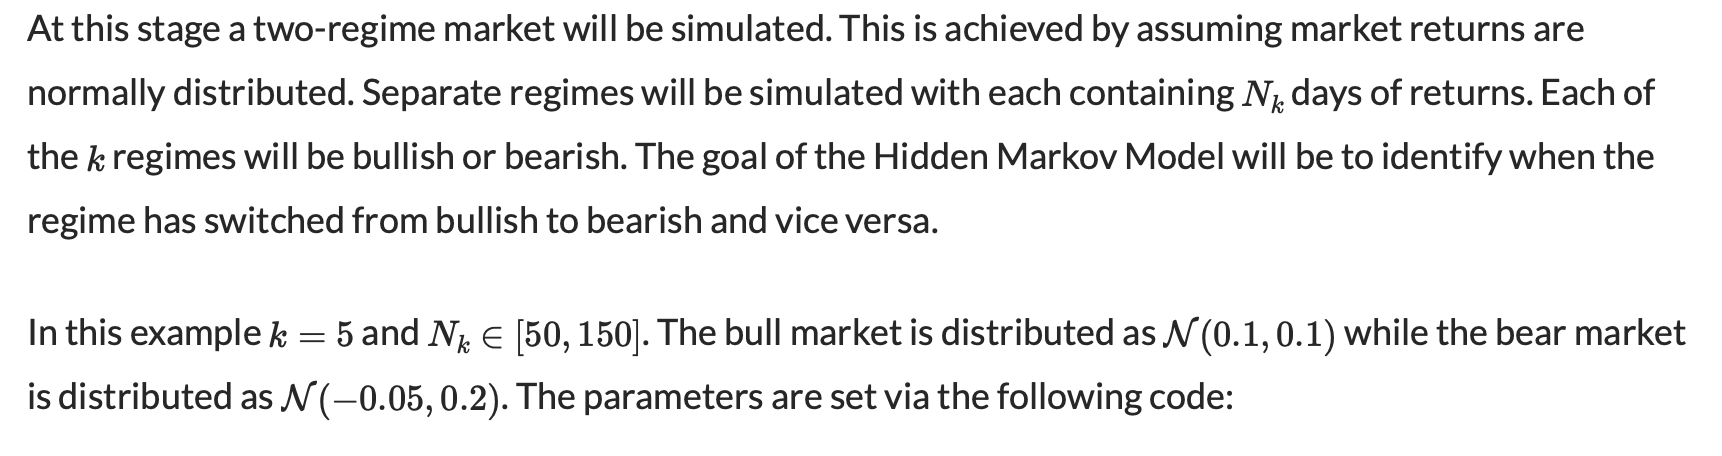

[*********************100%%**********************]  2 of 2 completed

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

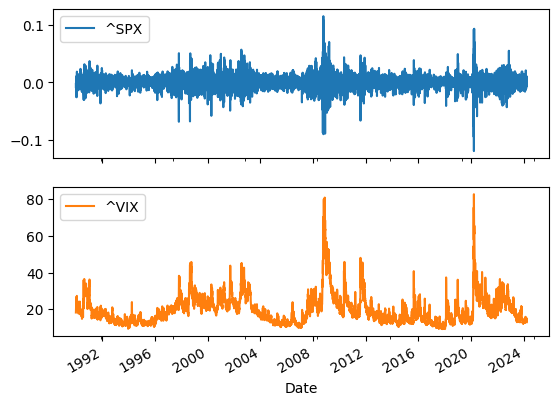

In [7]:
vol_df = yf.download(['^VIX', '^SPX'], period='max').Close.dropna()
vol_df['^SPX'] = vol_df['^SPX'].pct_change()
vol_df.dropna(inplace=True)
vol_df.plot(sharey=False, subplots=True)

All time 5% cVar: -4.0%
High Vol: -7.6%

All time 99% cVar: 4.0%
High Vol: 6.9%


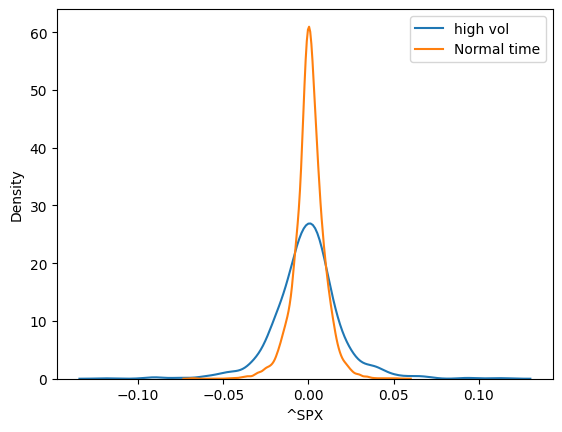

In [8]:
dot_com = vol_df['^SPX']['2000-01-30':'2002-12-30']
gfc = vol_df['^SPX']['2008-01-30':'2009-04-30']
covid = vol_df['^SPX']['2020-01-01':'2020-07-30'] # removing covid as its out of sample

# concatenate the three series
spx_highvol = pd.concat([dot_com, gfc, covid])
spx_normal = vol_df['^SPX'][~vol_df['^SPX'].index.isin(spx_highvol.index)]

# Calculate the moments
norm_mean = spx_normal.mean()
highvol_mean = spx_highvol.mean()

norm_std = spx_normal.std()
highvol_std = spx_highvol.std()

norm_skew = spx_normal.skew()
highvol_skew = spx_highvol.skew()

norm_kurt = spx_normal.kurtosis()
highvol_kurt = spx_highvol.kurtosis()

# plot the kde of the two series
sns.kdeplot(spx_highvol, label='high vol')
all = sns.kdeplot(spx_normal, label='Normal time')
plt.legend()

# Calc 5% cVar for both kda plots
all_time_cVarlow = vol_df['^SPX'].quantile(0.005)
high_vol_cVarlow = spx_highvol.quantile(0.005)
all_time_cVarhigh = vol_df['^SPX'].quantile(0.995)
high_vol_cVarhigh = spx_highvol.quantile(0.995)
print(f'All time 5% cVar: {round(all_time_cVarlow, 2)*100}%\nHigh Vol: {round(high_vol_cVarlow, 3)*100}%\n')
print(f'All time 99% cVar: {round(all_time_cVarhigh, 2)*100}%\nHigh Vol: {round(high_vol_cVarhigh, 3)*100}%')

### Sampling the distributional properties of each regime

Desired Skewness: -0.28556269511943344
Actual Skewness (Skew-Normal): -0.004859200758524117
Desired Kurtosis: 3.6180681071302825
Actual Kurtosis (Skew-Normal): 0.0007199007063130908


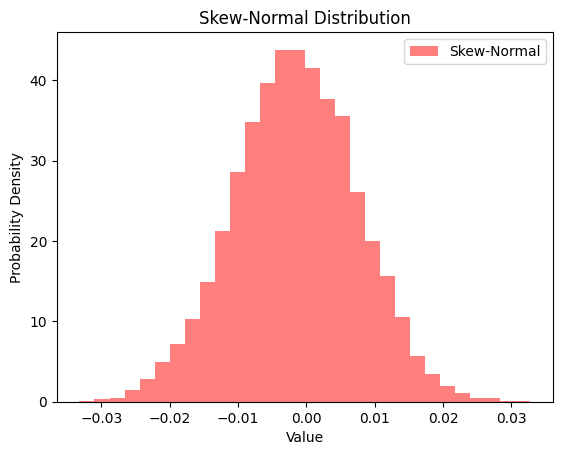

In [9]:
from scipy.stats import skewnorm, norm

# Set the desired parameters
mu = norm_mean  # mean
std = norm_std  # standard deviation
desired_skewness = norm_skew
desired_kurtosis = norm_kurt


# Generate 1000 samples from a skew-normal distribution
samples_skewnorm = skewnorm.rvs(a=desired_skewness, loc=mu, scale=std, size=10000)

actual_skewness_skewnorm = skewnorm.stats(a=desired_skewness, moments='s')
actual_kurtosis_skewnorm = skewnorm.stats(a=desired_skewness, moments='k')

print("Desired Skewness:", desired_skewness)
print("Actual Skewness (Skew-Normal):", actual_skewness_skewnorm)

print("Desired Kurtosis:", desired_kurtosis)
print("Actual Kurtosis (Skew-Normal):", actual_kurtosis_skewnorm)

# Plot histograms
plt.hist(samples_skewnorm, bins=30, density=True, alpha=0.5, color='red', label='Skew-Normal')
plt.title('Skew-Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

Desired Skewness: 0.0419335578221261
Actual Skewness (Skew-Normal): 1.606026199590878e-05
Desired Kurtosis: 5.372384910670334
Actual Kurtosis (Skew-Normal): 3.544238815530925e-07


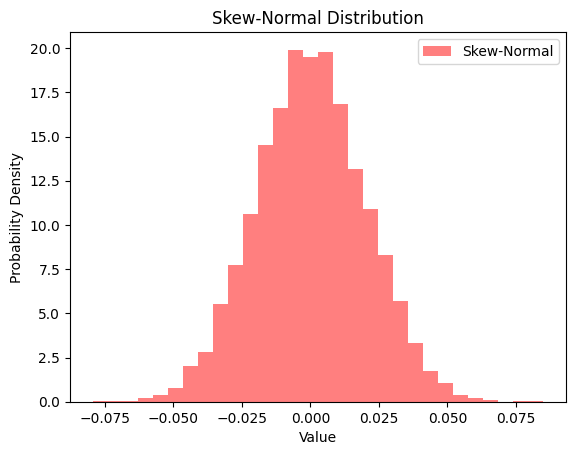

In [10]:
# Set the desired parameters
mu = highvol_mean  # mean
std = highvol_std  # standard deviation
desired_skewness = highvol_skew
desired_kurtosis = highvol_kurt


# Generate 1000 samples from a skew-normal distribution
samples_skewnorm = skewnorm.rvs(a=desired_skewness, loc=mu, scale=std, size=10000)

actual_skewness_skewnorm = skewnorm.stats(a=desired_skewness, moments='s')
actual_kurtosis_skewnorm = skewnorm.stats(a=desired_skewness, moments='k')

print("Desired Skewness:", desired_skewness)
print("Actual Skewness (Skew-Normal):", actual_skewness_skewnorm)

print("Desired Kurtosis:", desired_kurtosis)
print("Actual Kurtosis (Skew-Normal):", actual_kurtosis_skewnorm)

# Plot histograms
plt.hist(samples_skewnorm, bins=30, density=True, alpha=0.5, color='red', label='Skew-Normal')
plt.title('Skew-Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

## Deploying HMM to predict regime shifts

1. Variational Guassian
2. Guassian Mixture
3. Guassian HMM

- Using 1week returns for more stable/slow moving esimates
- using 2 state due to smoother estimates and using SPX returns better than VIX level because__

[*********************100%%**********************]  2 of 2 completed

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

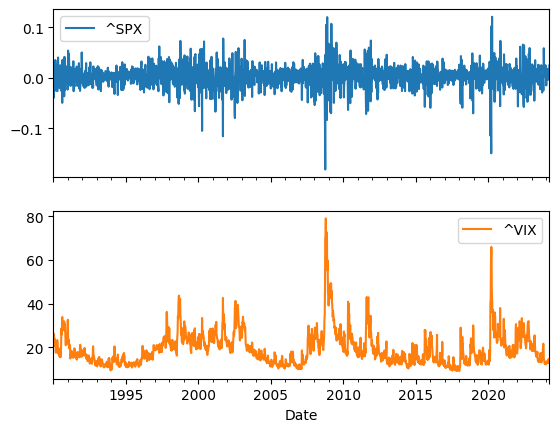

In [11]:
vol_df = yf.download(['^VIX', '^SPX'], period='max', interval='1wk').Close.dropna()
vol_df['^SPX'] = vol_df['^SPX'].pct_change()
vol_df.dropna(inplace=True)
vol_df.plot(sharey=False, subplots=True)

### 1. Variational Gaussian HMM

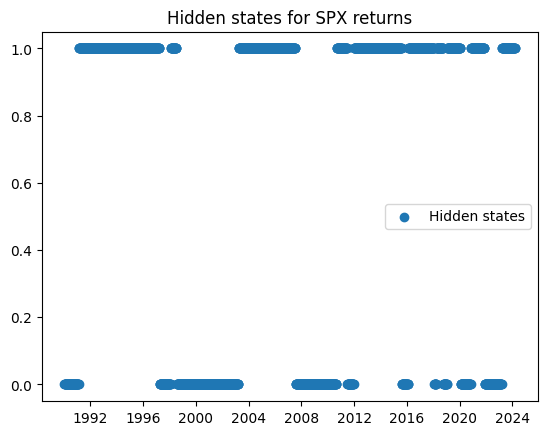

In [12]:
from hmmlearn.vhmm import VariationalGaussianHMM 

returns = np.array(vol_df['^SPX'].dropna())
train = returns[:int(0.8 * len(returns))].reshape(-1, 1)
test = returns[int(0.8 * len(returns)):].reshape(-1, 1)

# Fit a Hidden Markov Model with three states to the returns stream
hmm = VariationalGaussianHMM(n_components=2,  n_iter=1000, covariance_type="full", algorithm='viterbi', 
                             startprob_prior=np.array([0.5, 0.5])) # map
hmm.fit(train)

# Predict the hidden states
hidden_states = hmm.predict(test)
hidden_states = np.concatenate((hmm.predict(train), hidden_states))

# Get the posterior probabilities
post_probs_train = hmm.predict_proba(train)
post_probs_test = hmm.predict_proba(test)
post_probs = np.concatenate((post_probs_train, post_probs_test))

plt.scatter(vol_df['^SPX'].dropna().index, hidden_states, label='Hidden states')
plt.title('Hidden states for SPX returns')
plt.legend()

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_58706/2941132852.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax2.axvspan(vol_df['^SPX'].dropna().index[int(0.8 * len(returns))],vol_df['^SPX'].dropna().index[-1], edgecolor='red', color= 'grey', alpha=0.3, label='Test set')


Text(0.5, 1.0, 'Variational GMM')

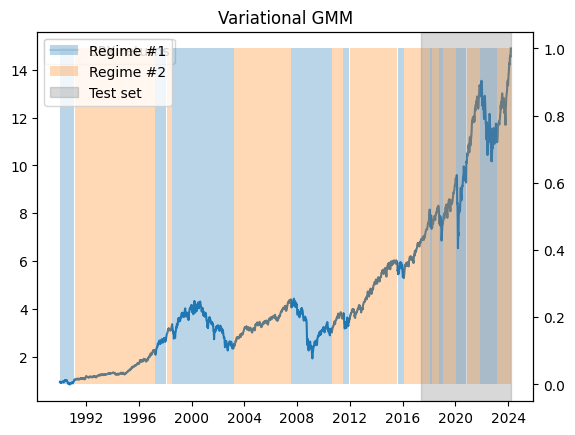

In [13]:
# plot on seperate y axis
fig, ax = plt.subplots()
ax.plot((1+vol_df['^SPX'].dropna()).cumprod(), label='SPX returns')
ax2 = ax.twinx()
for i in range(hmm.n_components):
    mask = hidden_states == i
    ax2.fill_between(vol_df['^SPX'].dropna().index, 0, 1, where=mask, label=f'Regime #{i + 1}', alpha=0.3)
ax2.axvspan(vol_df['^SPX'].dropna().index[int(0.8 * len(returns))],vol_df['^SPX'].dropna().index[-1], edgecolor='red', color= 'grey', alpha=0.3, label='Test set')
ax.legend()
ax2.legend()
ax2.set_title('Variational GMM')

### 2. Guassian Mixture

In [14]:
# vol_df = yf.download(['^SPX'], period='max', interval='1wk').Close.pct_change().dropna()
# vol_df.values

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_58706/192102659.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax2.axvspan(vol_df['^SPX'].dropna().index[int(0.8 * len(returns))],vol_df['^SPX'].dropna().index[-1], edgecolor='red', color= 'grey', alpha=0.3, label='Test set')


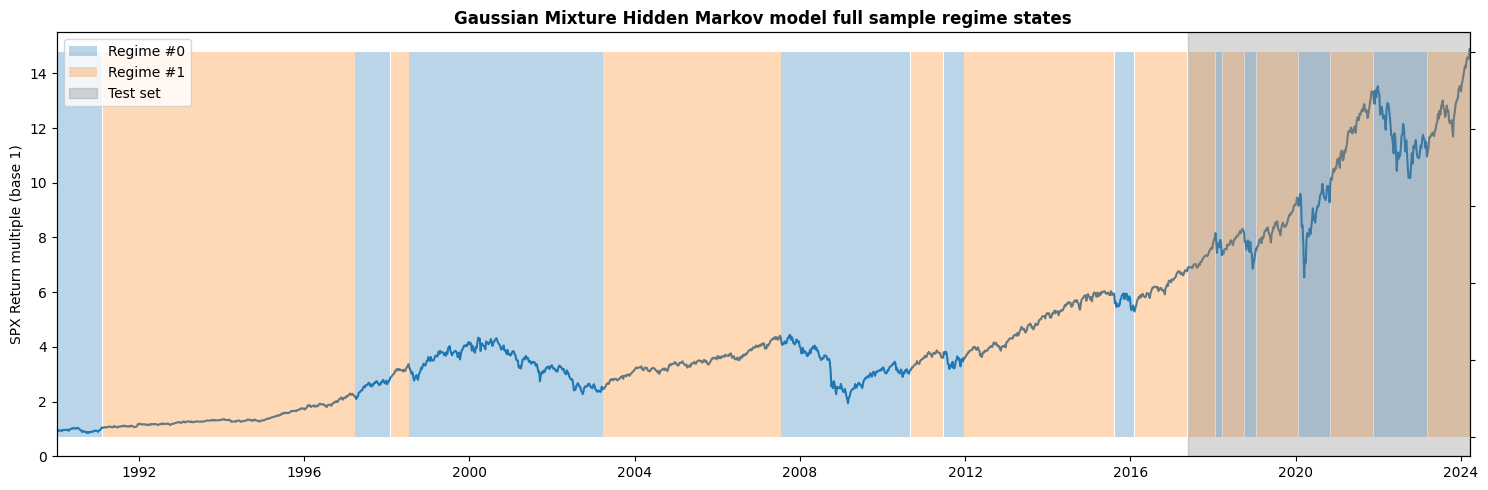

In [15]:
from hmmlearn.hmm import GMMHMM

returns = np.array(vol_df['^SPX'].dropna())
train = returns[:int(0.8 * len(returns))].reshape(-1, 1)
test = returns[int(0.8 * len(returns)):].reshape(-1, 1)

# Fit a Hidden Markov Model with three states to the returns stream
hmm = GMMHMM(n_components=2,  n_iter=1000, covariance_type="full", algorithm='viterbi', 
                             startprob_prior=np.array([0.5, 0.5])) # map
hmm.fit(train)

# Predict the hidden states
hidden_states = hmm.predict(test)
hidden_states = np.concatenate((hmm.predict(train), hidden_states))

# Get the posterior probabilities
post_probs_train = hmm.predict_proba(train)
post_probs_test = hmm.predict_proba(test)
post_probs = np.concatenate((post_probs_train, post_probs_test))

# Plot the data
fig, ax = plt.subplots(1,1, figsize=(15, 5))
ax.plot((1+vol_df['^SPX'].dropna()).cumprod(), label='SPX returns')
ax2 = ax.twinx()
for i in range(hmm.n_components):
    mask = hidden_states == i
    ax2.fill_between(vol_df['^SPX'].dropna().index, 0, 1, where=mask, label=f'Regime #{i}', alpha=0.3)
ax2.axvspan(vol_df['^SPX'].dropna().index[int(0.8 * len(returns))],vol_df['^SPX'].dropna().index[-1], edgecolor='red', color= 'grey', alpha=0.3, label='Test set')
ax2.set_title('Gaussian Mixture Hidden Markov model full sample regime states', fontweight='bold')
ax2.yaxis.set_ticklabels([])
ax2.legend(loc=2)
ax.set_xlim(vol_df['^SPX'].dropna().index[0], vol_df['^SPX'].dropna().index[-1])
ax.set_ylim(0,15.5)
ax.set_ylabel('SPX Return multiple (base 1)')
plt.tight_layout()
plt.savefig('GMHMM.png', dpi=600)

# ax[1].scatter(vol_df['^SPX'].dropna().index, hidden_states, label='Hidden states')
# ax[1].set_title('Hidden states for SPX returns')
# ax[1].legend()

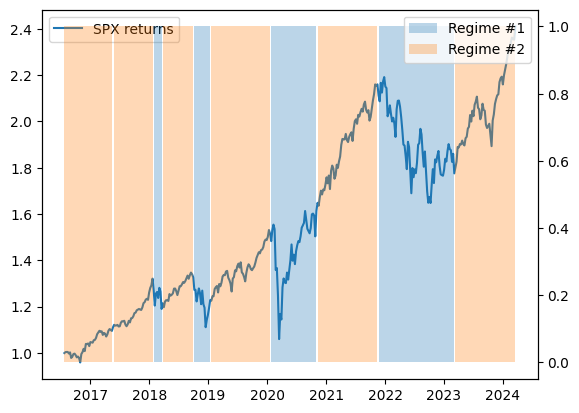

In [16]:
# Test set prediction
fig, ax = plt.subplots()
ax.plot((1+vol_df['^SPX'].iloc[-400:].dropna()).cumprod(), label='SPX returns')
ax2 = ax.twinx()
for i in range(hmm.n_components):
    mask = hidden_states[-400:] == i
    ax2.fill_between(vol_df['^SPX'].iloc[-400:].dropna().index, 0, 1, where=mask, label=f'Regime #{i + 1}', alpha=0.3)
ax.legend()
ax2.legend()

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_58649/2431756477.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax2.axvspan(vol_df['^SPX'].dropna().index[int(0.8 * len(returns))],vol_df['^SPX'].dropna().index[-1], edgecolor='red', color= 'grey', alpha=0.3, label='Test set')


Text(0.5, 1.0, 'GMM vs Vix level')

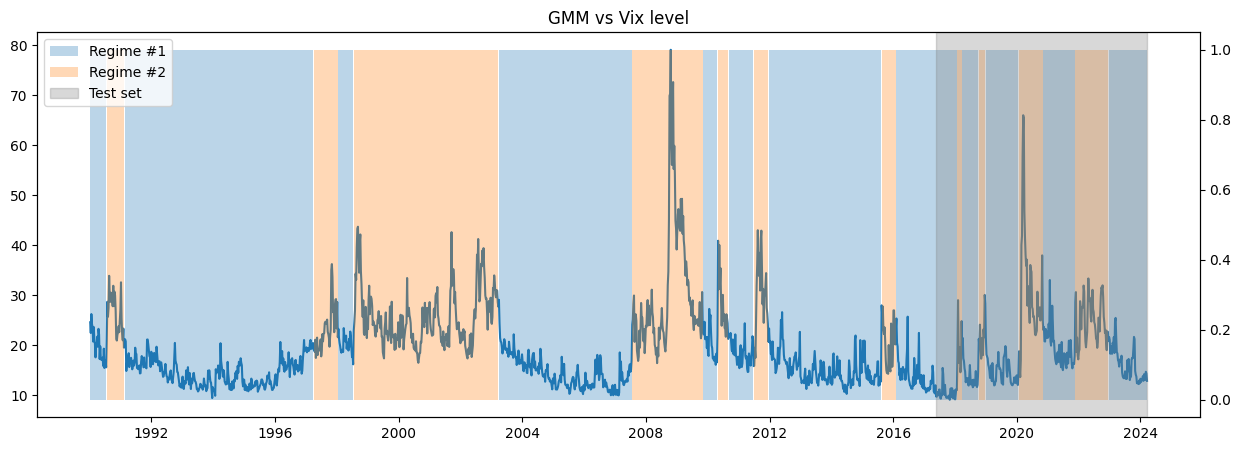

In [17]:
# Plot the data
fig, ax = plt.subplots(1,1, figsize=(15, 5))
ax.plot((vol_df['^VIX'].dropna()), label='VIX returns')
ax2 = ax.twinx()
for i in range(hmm.n_components):
    mask = hidden_states == i
    ax2.fill_between(vol_df['^SPX'].dropna().index, 0, 1, where=mask, label=f'Regime #{i + 1}', alpha=0.3)
ax2.axvspan(vol_df['^SPX'].dropna().index[int(0.8 * len(returns))],vol_df['^SPX'].dropna().index[-1], edgecolor='red', color= 'grey', alpha=0.3, label='Test set')
ax2.legend()
ax2.set_title('GMM vs Vix level')

In [18]:
# Convert hidden states to dataframe and export to csv
# hidden_states = pd.DataFrame(hidden_states, index=vol_df['^SPX'].dropna().index, columns=['Regime'])
# hidden_states.to_csv('hidden_states.csv')

### 3. Guassian HMM

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_58649/841124521.py:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax2.axvspan(vol_df['^SPX'].dropna().index[int(0.8 * len(returns))],vol_df['^SPX'].dropna().index[-1], edgecolor='red', color= 'grey', alpha=0.3, label='Test set')


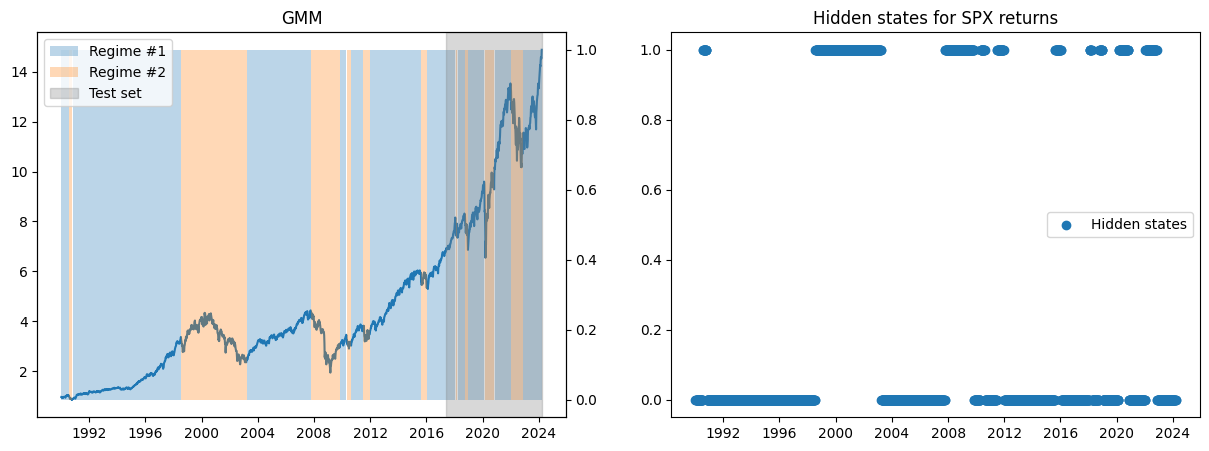

In [19]:
from hmmlearn.hmm import GaussianHMM


# Reshape the data to fit the format expected by HMM
returns = np.array(vol_df['^SPX'].dropna())
train = returns[:int(0.8 * len(returns))].reshape(-1, 1)
test = returns[int(0.8 * len(returns)):].reshape(-1, 1)

# Fit a Hidden Markov Model with three states to the returns stream
hmm = GaussianHMM(n_components=2,  n_iter=1000, covariance_type="full", startprob_prior=np.array([0.5, 0.5]))
hmm.fit(train)

# Predict the hidden states
hidden_states = hmm.predict(test)
hidden_states = np.concatenate((hmm.predict(train), hidden_states))

# Get the posterior probabilities
post_probs_train = hmm.predict_proba(train)
post_probs_test = hmm.predict_proba(test)
post_probs = np.concatenate((post_probs_train, post_probs_test))


fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].plot((1+vol_df['^SPX'].dropna()).cumprod(), label='SPX returns')
ax2 = ax[0].twinx()
for i in range(hmm.n_components):
    mask = hidden_states == i
    ax2.fill_between(vol_df['^SPX'].dropna().index, 0, 1, where=mask, label=f'Regime #{i + 1}', alpha=0.3)
ax2.axvspan(vol_df['^SPX'].dropna().index[int(0.8 * len(returns))],vol_df['^SPX'].dropna().index[-1], edgecolor='red', color= 'grey', alpha=0.3, label='Test set')
ax2.legend()
ax2.set_title('GMM')

ax[1].scatter(vol_df['^SPX'].dropna().index, hidden_states, label='Hidden states')
ax[1].set_title('Hidden states for SPX returns')
ax[1].legend()

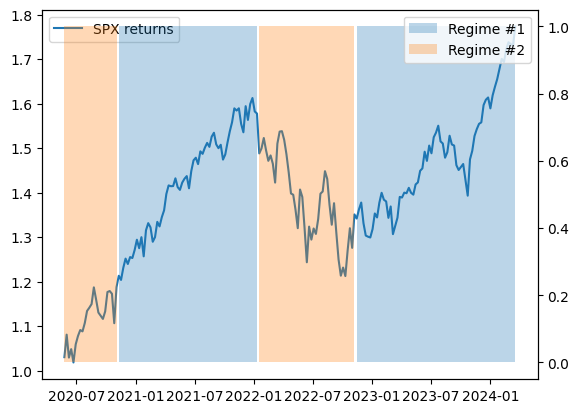

In [20]:
# Test set prediction
fig, ax = plt.subplots()
ax.plot((1+vol_df['^SPX'].iloc[-200:].dropna()).cumprod(), label='SPX returns')
ax2 = ax.twinx()
for i in range(hmm.n_components):
    mask = hidden_states[-200:] == i
    ax2.fill_between(vol_df['^SPX'].iloc[-200:].dropna().index, 0, 1, where=mask, label=f'Regime #{i + 1}', alpha=0.3)
ax.legend()
ax2.legend()

## Assessing returns based on predicted regimes

[*********************100%%**********************]  7 of 7 completed


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages

Text(0.5, 1.0, 'S&P500 and Regime')

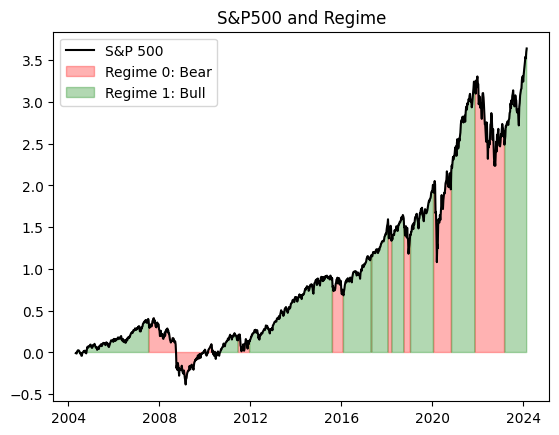

In [19]:
returns = yf.download(['^SPX', 'EEM', '^FTSE', '^STOXX', 'GC=F', 'HG=F', '^VIX'], period='max', interval='1wk').Close.pct_change()
returns.index = pd.to_datetime(returns.index).date

regime = pd.read_csv('1_hidden_states.csv')
regime['Date'] = pd.to_datetime(regime['Date']).dt.date
regime.set_index('Date', inplace=True)

temp = returns.join(regime, how='inner')
temp = temp.dropna()

# plot the returns and regime
fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot((1+temp['^SPX']).cumprod()-1, label='S&P 500', color='black')
ax.fill_between(temp.index, 0, (1+temp['^SPX']).cumprod()-1, where=temp['Regime']==0, color='red', alpha=0.3, label='Regime 0: Bear')
ax.fill_between(temp.index, 0, (1+temp['^SPX']).cumprod()-1, where=temp['Regime']==1, color='green', alpha=0.3, label='Regime 1: Bull')
ax.legend(loc='upper left')
ax.set_title('S&P500 and Regime')

In [20]:
# Calculate the mean and std of returns across different assets per regime
sharpeRatio = lambda x: np.mean(x) / np.std(x)
perc_positive_months = lambda x: np.sum(x > 0) / len(x)
regime_stats = temp.groupby('Regime').agg(['mean', 'std', sharpeRatio, perc_positive_months])
regime_stats.rename(columns={'<lambda_0>': 'Sharpe', '<lambda_1>':'%_PostitiveWeeks'}, inplace=True)
regime_stats

EEM                                          GC=F            \
            mean      std    Sharpe %_PostitiveWeeks      mean       std   
Regime                                                                     
0      -0.001089  0.04628 -0.023562         0.487032  0.003204  0.029400   
1       0.002590  0.02391  0.108382         0.552326  0.001270  0.020812   

                                       HG=F            ...      ^SPX  \
          Sharpe %_PostitiveWeeks      mean       std  ...    Sharpe   
Regime                                                 ...             
0       0.109136         0.579251 -0.000007  0.046297  ... -0.040267   
1       0.061087         0.565407  0.002739  0.031544  ...  0.240181   

                           ^STOXX                                       \
       %_PostitiveWeeks      mean       std    Sharpe %_PostitiveWeeks   
Regime                                                                   
0              0.495677 -0.002228  0.036027 -0.061943         0.487032   
1              0.610465  0.002665  0.016377  0.162873         0.613372   

            ^VIX                                       
            mean       std    Sharpe %_PostitiveWeeks  
Regime                                                 
0       0.024233  0.201017  0.120728         0.452450  
1       0.004024  0.131981  0.030512         0.462209  

[2 rows x 28 columns]

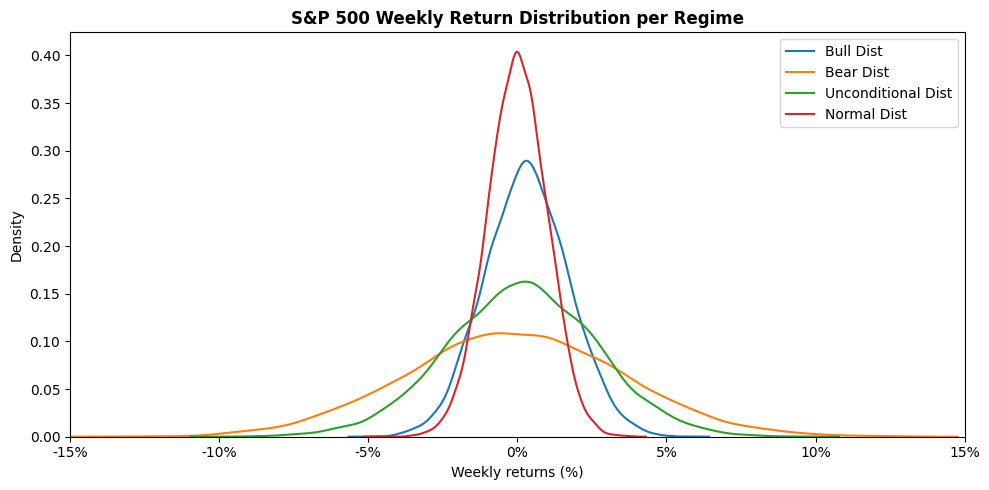

In [24]:
spx_regime = regime_stats['^SPX']
bull_mean = spx_regime.loc[1, 'mean'] * 100
bull_std = spx_regime.loc[1, 'std'] * 100

bear_mean = spx_regime.loc[0, 'mean']* 100
bear_std = spx_regime.loc[0, 'std']* 100

all_mean = returns['^SPX'].mean()* 100
all_std = returns['^SPX'].std()* 100

# create normally distribued data
np.random.seed(0)
n = 10000
bull = np.random.normal(bull_mean, bull_std, n)
bear = np.random.normal(bear_mean, bear_std, n)
normal = np.random.standard_normal(n)
unconditioned = np.random.normal(all_mean,all_std,n)

# plot the returns
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(bull, label='Bull Dist')
sns.kdeplot(bear,label='Bear Dist')
sns.kdeplot(unconditioned, label='Unconditional Dist')
sns.kdeplot(normal, label='Normal Dist')
ax.set_title('S&P 500 Weekly Return Distribution per Regime', fontweight='bold')
ax.legend(loc='upper right')
ax.set_xlabel('Weekly returns (%)')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/100:.0%}'))
ax.set_xlim(-15, 15)
plt.tight_layout()
plt.savefig('regime_pdfs.png', dpi=600)